In [1]:
import requests
import pandas as pd


In [2]:
api_key='a58413697e8263de9c95cab92049ea3f'
symbol='BTCUSD'
query=f'https://financialmodelingprep.com/api/v3/historical-price-full/{symbol}?apikey={api_key}'

In [3]:
response=requests.get(query)


In [4]:
df = pd.DataFrame(response.json()['historical'])

In [5]:
df

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
0,2021-08-31,46940.296875,47195.351563,46787.875000,47179.195313,47179.195313,3.043963e+10,3.043963e+10,238.89844,0.509,47054.14063,"August 31, 21",0.00509
1,2021-08-30,48716.660156,48870.296875,47929.773438,48045.187500,48045.187500,2.693493e+10,2.693493e+10,-671.47266,-1.378,48281.75260,"August 30, 21",-0.01378
2,2021-08-29,48911.250000,49644.113281,47925.855469,48829.832031,48829.832031,2.588965e+10,2.588965e+10,-81.41797,-0.166,48799.93359,"August 29, 21",-0.00166
3,2021-08-28,49072.585938,49283.503906,48499.238281,48902.402344,48902.402344,2.856810e+10,2.856810e+10,-170.18359,-0.347,48895.04818,"August 28, 21",-0.00347
4,2021-08-27,46894.554688,49112.785156,46394.281250,49058.667969,49058.667969,3.451108e+10,3.451108e+10,2164.11328,4.615,48188.57813,"August 27, 21",0.04615
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2016-09-04,598.590027,611.836975,596.848022,608.633972,608.633972,9.794290e+07,9.794290e+07,10.04395,1.678,605.77299,"September 04, 16",0.01678
1823,2016-09-03,575.554993,599.500000,574.056030,598.211975,598.211975,1.590140e+08,1.590140e+08,22.65698,3.937,590.58934,"September 03, 16",0.03937
1824,2016-09-02,572.409973,575.643005,570.810974,575.536987,575.536987,7.991080e+07,7.991080e+07,3.12701,0.546,573.99699,"September 02, 16",0.00546
1825,2016-09-01,575.546021,576.310974,571.814026,572.302979,572.302979,7.692340e+07,7.692340e+07,-3.24304,-0.563,573.47599,"September 01, 16",-0.00563


In [6]:
X = df['date']
y = df['adjClose']

In [94]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error
import math

In [21]:
df['date'] = pd.to_datetime(df['date'])

In [22]:
df_2 = df[['date', 'adjClose']]

In [23]:
date = pd.to_datetime('2020-08-31')

In [30]:
df_lastyear = df_2[df_2['date']>date]

In [31]:
df_lastyear = df_lastyear.set_index('date')

In [63]:
df_lastyear

,adjClose
date,
2021-08-31,47179.195313
2021-08-30,48045.187500
2021-08-29,48829.832031
2021-08-28,48902.402344
2021-08-27,49058.667969
...,...
2020-09-05,10169.567383
2020-09-04,10511.813477
2020-09-03,10245.296875


In [33]:
from sklearn.model_selection import train_test_split

In [40]:
train_size = 0.8
index = round(train_size*df_lastyear.shape[0])
df_train = df_lastyear.iloc[:index]
df_test = df_lastyear.iloc[index:]

In [41]:
from sklearn.metrics import r2_score

In [101]:
df_test

,adjClose
date,
2020-11-12,16276.343750
2020-11-11,15701.339844
2020-11-10,15290.902344
2020-11-09,15332.315430
2020-11-08,15479.567383
...,...
2020-09-05,10169.567383
2020-09-04,10511.813477
2020-09-03,10245.296875


In [42]:
y_pred = df_test.shift(1)
y_pred

,adjClose
date,
2020-11-12,NaN
2020-11-11,16276.343750
2020-11-10,15701.339844
2020-11-09,15290.902344
2020-11-08,15332.315430
...,...
2020-09-05,10280.351563
2020-09-04,10169.567383
2020-09-03,10511.813477


In [46]:
y_pred = df_test.shift(1).dropna()

In [47]:
y_pred

,adjClose
date,
2020-11-11,16276.343750
2020-11-10,15701.339844
2020-11-09,15290.902344
2020-11-08,15332.315430
2020-11-07,15479.567383
...,...
2020-09-05,10280.351563
2020-09-04,10169.567383
2020-09-03,10511.813477


In [102]:
y_test = df_test.drop(['2020-11-12'])

In [52]:
y_pred = df_test.shift(1).dropna()
y_true = df_test.drop(['2020-11-12'])
print(f"R2:{r2_score(y_true, y_pred)}")

R2:0.9545132259605507


In [103]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape

print('MSE =', round(mse, 2))
print('MAE =', round(mae, 2))

MSE = 118299.43
MAE = 224.33


In [64]:
df2 = df_lastyear.copy()
df2_train = df_train.copy() 
df2_test = df_test.copy()

for i in range(1, 13):
    df2_train[f't - {i}'] = df_train['adjClose'].shift(i)
    df2_test[f't - {i}'] = df_test['adjClose'].shift(i)

df2_train.dropna(inplace=True)    
df2_test.dropna(inplace=True)    
df2_train.head()

,adjClose,t - 1,t - 2,t - 3,t - 4,t - 5,t - 6,t - 7,t - 8,t - 9,t - 10,t - 11,t - 12
date,,,,,,,,,,,,,
2021-08-19,46717.578125,49339.175781,48905.492188,49321.652344,49546.148438,47706.117188,48960.789063,46942.218750,49058.667969,48902.402344,48829.832031,48045.187500,47179.195313
2021-08-18,44801.187500,46717.578125,49339.175781,48905.492188,49321.652344,49546.148438,47706.117188,48960.789063,46942.218750,49058.667969,48902.402344,48829.832031,48045.187500
2021-08-17,44695.359375,44801.187500,46717.578125,49339.175781,48905.492188,49321.652344,49546.148438,47706.117188,48960.789063,46942.218750,49058.667969,48902.402344,48829.832031
2021-08-16,46004.484375,44695.359375,44801.187500,46717.578125,49339.175781,48905.492188,49321.652344,49546.148438,47706.117188,48960.789063,46942.218750,49058.667969,48902.402344
2021-08-15,47047.003906,46004.484375,44695.359375,44801.187500,46717.578125,49339.175781,48905.492188,49321.652344,49546.148438,47706.117188,48960.789063,46942.218750,49058.667969


In [65]:
# Train Test Split
X2_train = df2_train.drop(columns = ['adjClose'])
y2_train = df2_train['adjClose']
X2_test = df2_test.drop(columns = ['adjClose'])
y2_test = df2_test['adjClose']

print(X2_train.shape,y2_train.shape, X2_test.shape,y2_test.shape)

(280, 12) (280,) (61, 12) (61,)


In [66]:
from sklearn.linear_model import LinearRegression

In [68]:
import matplotlib.pyplot as plt

R2:  0.9016269134024749


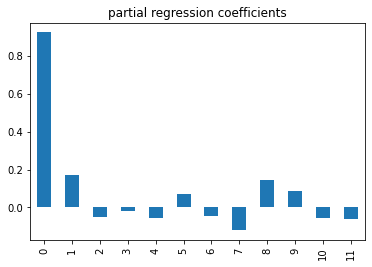

In [69]:
model = LinearRegression()
model = model.fit(X2_train, y2_train)

print('R2: ', r2_score(y2_test, model.predict(X2_test)))
pd.Series(model.coef_).plot(kind='bar')
plt.title('partial regression coefficients');

In [73]:
from statsmodels.tsa.seasonal import seasonal_decompose

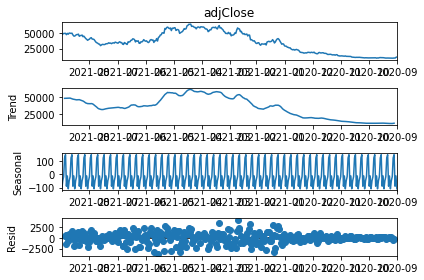

In [87]:
# Additive Decomposition (y = Trend + Seasonal + Residuals)
result_add = seasonal_decompose(df_lastyear['adjClose'], model='additive')
result_add.plot();

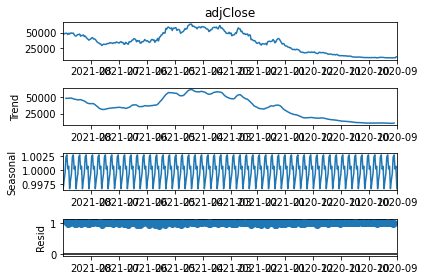

In [88]:
# Multiplicative Decomposition (y = Trend * Seasonal * Residuals)
result_mul = seasonal_decompose(df_lastyear['adjClose'], model='multiplicative')
result_mul.plot();

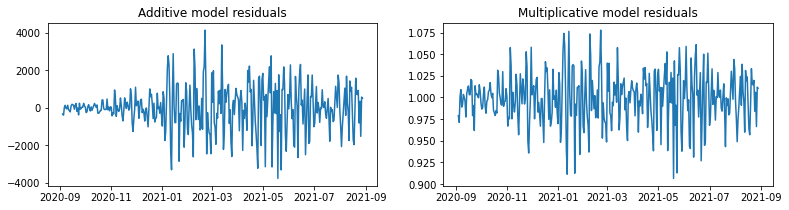

In [76]:
# Plot the residuals with "result_add.resid" to decide
f, (ax1, ax2) = plt.subplots(1,2, figsize=(13,3))
ax1.plot(result_add.resid); ax1.set_title("Additive model residuals")
ax2.plot(result_mul.resid); ax2.set_title("Multiplicative model residuals");

In [83]:
from statsmodels.tsa.stattools import adfuller
adfuller(df_lastyear.adjClose)[1]

0.8617565739006707

In [84]:
print('additive resid: ', adfuller(result_add.resid.dropna())[1])
print('multipl resid: ', adfuller(result_mul.resid.dropna())[1])

additive resid:  3.615129591651805e-11
multipl resid:  5.448810847839619e-20


In [85]:
from statsmodels.graphics.tsaplots import plot_acf

In [89]:
from statsmodels.graphics.tsaplots import plot_pacf

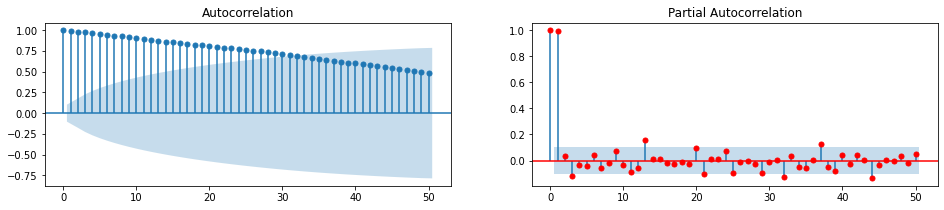

In [93]:
fig, axes = plt.subplots(1,2, figsize=(16,3))
plot_acf(df_lastyear.adjClose, lags=50, ax=axes[0]);
plot_pacf(df_lastyear.adjClose, lags=50, ax=axes[1], color='r');

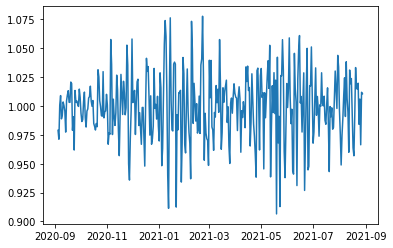

In [106]:
plt.plot(result_mul.resid)

<AxesSubplot:ylabel='Density'>

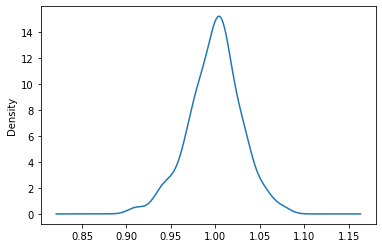

In [107]:
result_mul.resid.plot(kind='kde')

In [118]:
model_2 = LinearRegression()
model_2 = model_2.fit(df_lastyear-1, y)

ValueError: Found input variables with inconsistent numbers of samples: [365, 1827]

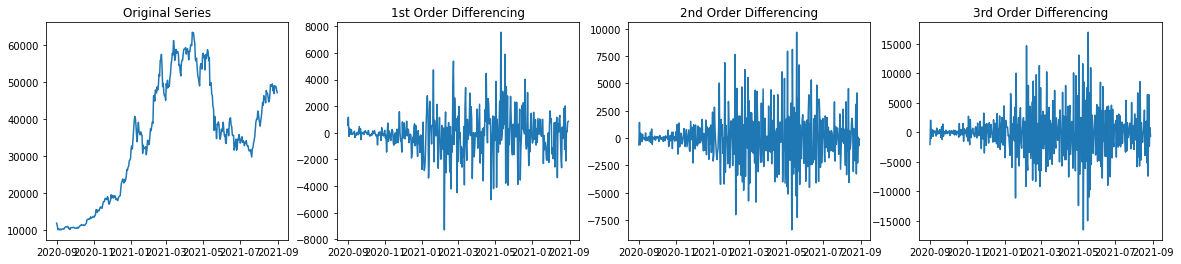

In [117]:
zero_diff = df_lastyear.adjClose
first_order_diff = df_lastyear.adjClose.diff(1)
second_order_diff = df_lastyear.adjClose.diff(1).diff(1)
third_order_diff = df_lastyear.adjClose.diff(1).diff(1).diff(1)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,4))
ax1.plot(zero_diff); ax1.set_title('Original Series')
ax2.plot(first_order_diff); ax2.set_title('1st Order Differencing')
ax3.plot(second_order_diff); ax3.set_title('2nd Order Differencing')
ax4.plot(third_order_diff); ax4.set_title('3rd Order Differencing');

In [129]:
print('p-value zero-diff: ', adfuller(df_lastyear['adjClose'])[1])
print('p-value first-diff: ', adfuller(df_lastyear['adjClose'].diff().dropna())[1])
print('p-value second-diff: ', adfuller(df_lastyear['adjClose'].diff().diff().dropna())[1])

p-value zero-diff:  0.8617565739006707
p-value first-diff:  3.0180815149544007e-06
p-value second-diff:  3.810273758730942e-14


In [ ]:
# percentage difference of price

In [131]:
from pmdarima.arima.utils import ndiffs
ndiffs(df_lastyear['adjClose'])

1

In [135]:
y_diff = first_order_diff.dropna()

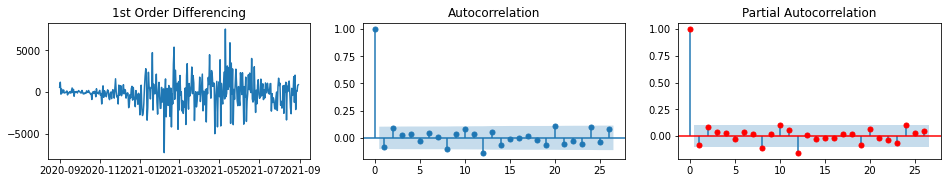

In [136]:
fig, axes = plt.subplots(1,3, figsize=(16,2.5))
axes[0].plot(y_diff); axes[0].set_title('1st Order Differencing')
plot_acf(y_diff, ax=axes[1]);
plot_pacf(y_diff, ax=axes[2], c='r');

In [134]:
from statsmodels.tsa.arima_model import ARIMA #statsmodels 0.11
# from statsmodels.tsa.arima.model import ARIMA #statsmodels 0.12

In [138]:
arima = ARIMA(df['adjClose'], order=(1,1,1))
arima = arima.fit()
arima.summary()

/Users/guillaumetrounson/.pyenv/versions/3.8.6/envs/cryptocurrency_trading/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.08152D+00    |proj g|=  6.57607D-04

At iterate    5    f=  8.08143D+00    |proj g|=  3.55271D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     12      1     0     0   1.776D-07   8.081D+00
  F =   8.0814268143162078     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.adjClose   No. Observations:                 1826
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -14756.685
Method:                       css-mle   S.D. of innovations            782.494
Date:                Tue, 31 Aug 2021   AIC                          29521.371
Time:                        17:48:00   BIC                          29543.410
Sample:                             1   HQIC                         29529.500
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -25.5230     17.508     -1.458      0.145     -59.838       8.792
ar.L1.D.adjClose    -0.5632      0.158     -3.576      0.000      -0.872      -0.254
ma.L1.D.adjClose     0.4945      0.165      2.994      0.003       0.171       0.818
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7756           +0.0000j            1.7756            0.5000
MA.1           -2.0221           +0.0000j            2.0221            0.5000
-----------------------------------------------------------------------------
"""

In [140]:
import pmdarima as pm
smodel = pm.auto_arima(df['adjClose'],
                       start_p=1, max_p=3,
                       start_q=1, max_q=3,
                       seasonal=False,
                       trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=29524.171, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=29529.939, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=29528.549, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=29528.982, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=29529.867, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=29520.440, Time=0.46 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=29519.706, Time=0.16 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=29520.333, Time=0.21 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=29522.163, Time=0.67 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=29519.558, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=29528.570, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=29520.133, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=29519.740, Time=0.39 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=29523.937, Time=0.22 sec
 ARIMA(3,1,1)(0,0,0

In [141]:
arima2 = ARIMA(df['adjClose'], order=(2,1,0))
arima2 = arima2.fit()
arima2.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.08019D+00    |proj g|=  3.38929D-04

At iterate    5    f=  8.08019D+00    |proj g|=  6.11067D-05

At iterate   10    f=  8.08019D+00    |proj g|=  2.01439D-04

At iterate   15    f=  8.08019D+00    |proj g|=  1.35003D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     33      1     0     0   1.350D-05   8.080D+00
  F =   8.0801863125469549     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/guillaumetrounson/.pyenv/versions/3.8.6/envs/cryptocurrency_trading/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly 

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.adjClose   No. Observations:                 1826
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -14754.420
Method:                       css-mle   S.D. of innovations            781.522
Date:                Tue, 31 Aug 2021   AIC                          29516.840
Time:                        17:52:36   BIC                          29538.880
Sample:                             1   HQIC                         29524.970
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -25.5579     18.561     -1.377      0.169     -61.937      10.822
ar.L1.D.adjClose    -0.0585      0.023     -2.504      0.012      -0.104      -0.013
ar.L2.D.adjClose     0.0732      0.023      3.135      0.002       0.027       0.119
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.3190           +0.0000j            3.3190            0.5000
AR.2            4.1179           +0.0000j            4.1179            0.0000
-----------------------------------------------------------------------------
"""

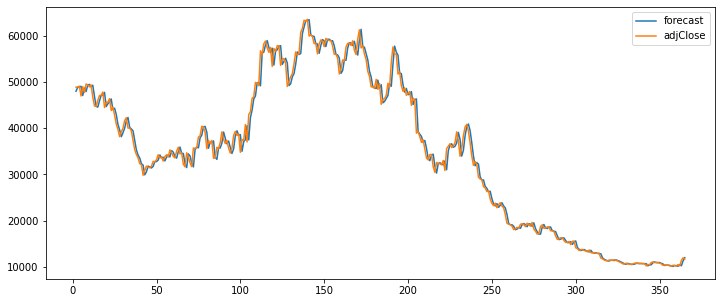

In [144]:
arima2.plot_predict(end=365);
fig = plt.gcf(); fig.set_size_inches(12, 5);